**Exploratory Data Analysis on covid 19 virus**

**Overview about Covid 19**

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic.
<br>
<br>
Coronaviruses are a large family of enveloped, non-segmented, single-stranded, positive-sense RNA viruses that circulate among animals including camels, cats, and bats. Coronaviruses derive their name from their electron microscopic image, which resembles a crown – or corona
The symptoms of COVID‑19 are variable but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms.
<br>
<br> 
Of those who develop symptoms noticeable enough to be classified as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% develop critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
from sympy import rotations

*Preparing and cleaning data*

Getting Data & making a csv file which we need for project(countries_covid_df)


In [2]:
urlretrieve('https://gist.githubusercontent.com/aakashns/b2a968a6cfd9fbbb0ff3d6bd0f26262b/raw/b115ed1dfa17f10fc88bf966236cd4d9032f1df8/covid-countries-data.csv', 
            'covid-countries-data.csv')

('covid-countries-data.csv', <http.client.HTTPMessage at 0x245b1ff1850>)

In [3]:
urlretrieve('https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x245b20060d0>)

In [4]:
countries_df = pd.read_csv('countries.csv')

In [5]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [6]:
covid_data_df = pd.read_csv('covid-countries-data.csv')

In [7]:
covid_data_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


merging two dataframes into one 

In [8]:
countries_covid_df = countries_df.merge(covid_data_df , left_on= 'location' , right_on= 'location')


In [9]:
countries_covid_df


,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,38243.0,1409.0,NaN
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,9728.0,296.0,NaN
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,45158.0,1525.0,NaN
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2729.0,109.0,NaN
...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,1046.0,35.0,261004.0
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,766.0,1.0,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,1976.0,571.0,NaN
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,12415.0,292.0,NaN


Add columns `tests_per_million`, `cases_per_million` and `deaths_per_million` into `combined_df`.

In [10]:
countries_covid_df['tests_per_million'] = countries_covid_df['total_tests'] * 1e6 / countries_covid_df['population']

In [11]:
countries_covid_df['cases_per_million'] = countries_covid_df['total_cases']*1e6 / countries_covid_df['population']

In [12]:
countries_covid_df['deaths_per_million'] =countries_covid_df['total_deaths'] * 1e6 /countries_covid_df['population']

Create a dataframe with 10 countires that have highest number of tests per million people.

In [13]:
highest_tests_df = countries_covid_df.sort_values('tests_per_million' , ascending = False).head(10)
highest_tests_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,tests_per_million,cases_per_million,deaths_per_million
197,United Arab Emirates,Asia,9890400.0,77.97,1.200,67293.483,71540.0,387.0,7177430.0,725696.635121,7233.276713,39.128852
14,Bahrain,Asia,1701583.0,77.29,2.000,43290.705,52440.0,190.0,1118837.0,657527.137965,30818.361490,111.660730
115,Luxembourg,Europe,625976.0,82.25,4.510,94277.965,7928.0,124.0,385820.0,616349.508607,12665.022301,198.090662
122,Malta,Europe,441539.0,82.53,4.485,36513.323,1931.0,13.0,188539.0,427004.183096,4373.339614,29.442473
53,Denmark,Europe,5792203.0,80.90,2.500,46682.515,17195.0,626.0,2447911.0,422621.755488,2968.645954,108.076323
96,Israel,Asia,8655541.0,82.97,2.990,33132.320,122539.0,969.0,2353984.0,271962.665303,14157.289533,111.951408
89,Iceland,Europe,341250.0,82.99,2.910,46482.958,2121.0,10.0,88829.0,260304.761905,6215.384615,29.304029
157,Russia,Europe,145934460.0,72.58,8.050,24765.954,1005000.0,17414.0,37176827.0,254750.159763,6886.653091,119.327539
199,United States,North America,331002647.0,78.86,2.770,54225.446,6114406.0,185744.0,83898416.0,253467.507769,18472.377957,561.155633
10,Australia,Oceania,25499881.0,83.44,3.840,44648.710,25923.0,663.0,6255797.0,245326.517406,1016.592979,26.000121


Create a dataframe with 10 countires that have highest number of positive cases per million people.

In [14]:
highest_cases_df = countries_covid_df.sort_values('cases_per_million' , ascending= False).head(10)
highest_cases_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,tests_per_million,cases_per_million,deaths_per_million
155,Qatar,Asia,2881060.0,80.23,1.20,116935.600,119206.0,199.0,634745.0,220316.480740,41375.743650,69.071800
14,Bahrain,Asia,1701583.0,77.29,2.00,43290.705,52440.0,190.0,1118837.0,657527.137965,30818.361490,111.660730
147,Panama,North America,4314768.0,78.51,2.30,22267.037,94084.0,2030.0,336345.0,77952.047480,21805.112117,470.477208
40,Chile,South America,19116209.0,80.18,2.11,22767.037,414739.0,11344.0,2458762.0,128621.841287,21695.671982,593.423100
162,San Marino,Europe,33938.0,84.97,3.80,56861.470,735.0,42.0,NaN,NaN,21657.139490,1237.550828
9,Aruba,North America,106766.0,76.29,NaN,35973.781,2211.0,12.0,NaN,NaN,20708.839893,112.395332
105,Kuwait,Asia,4270563.0,75.49,2.00,65530.537,86478.0,535.0,621616.0,145558.325682,20249.789079,125.276222
150,Peru,South America,32971846.0,76.74,1.60,12236.706,663437.0,29259.0,584232.0,17719.117092,20121.318048,887.393445
27,Brazil,South America,212559409.0,75.88,2.20,14103.452,3997865.0,123780.0,4797948.0,22572.268255,18808.224105,582.331314
199,United States,North America,331002647.0,78.86,2.77,54225.446,6114406.0,185744.0,83898416.0,253467.507769,18472.377957,561.155633


 Create a dataframe with 10 countires that have highest number of deaths cases per million people?

In [15]:
highest_deaths_df = countries_covid_df.sort_values('deaths_per_million',ascending=False).head(10)
highest_deaths_df


,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,tests_per_million,cases_per_million,deaths_per_million
162,San Marino,Europe,33938.0,84.97,3.80,56861.470,735.0,42.0,NaN,NaN,21657.139490,1237.550828
150,Peru,South America,32971846.0,76.74,1.60,12236.706,663437.0,29259.0,584232.0,17719.117092,20121.318048,887.393445
18,Belgium,Europe,11589616.0,81.63,5.64,42658.576,85817.0,9898.0,2281853.0,196887.713967,7404.645676,854.040375
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,NaN,NaN,15518.022390,685.950948
177,Spain,Europe,46754783.0,83.56,2.97,34272.360,479554.0,29194.0,6416533.0,137238.001939,10256.790198,624.406705
198,United Kingdom,Europe,67886004.0,81.32,2.54,39753.244,338676.0,41514.0,13447568.0,198090.434075,4988.892850,611.525168
40,Chile,South America,19116209.0,80.18,2.11,22767.037,414739.0,11344.0,2458762.0,128621.841287,21695.671982,593.423100
97,Italy,Europe,60461828.0,83.51,3.18,35220.084,271515.0,35497.0,5214766.0,86248.897403,4490.684602,587.097697
27,Brazil,South America,212559409.0,75.88,2.20,14103.452,3997865.0,123780.0,4797948.0,22572.268255,18808.224105,582.331314
182,Sweden,Europe,10099270.0,82.80,2.22,46949.283,84532.0,5820.0,NaN,NaN,8370.109919,576.279276


10 countries with large population

In [16]:
#highest_cases_df = countries_covid_df.sort_values('cases_per_million' , ascending= False).head(10)
highly_populated_countries = countries_covid_df.sort_values('population' , ascending=False).head(10)

In [17]:
highly_populated_countries

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,tests_per_million,cases_per_million,deaths_per_million
41,China,Asia,1.439324e+09,76.91,4.34,15308.712,89953.0,4727.0,NaN,NaN,62.496710,3.284181
90,India,Asia,1.380004e+09,69.66,0.53,6426.674,3853406.0,67376.0,44337201.0,32128.304433,2792.314316,48.823033
199,United States,North America,3.310026e+08,78.86,2.77,54225.446,6114406.0,185744.0,83898416.0,253467.507769,18472.377957,561.155633
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744,180646.0,7616.0,1312477.0,4798.404596,660.440218,27.844030
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708,297014.0,6328.0,2662508.0,12053.419817,1344.609832,28.647441
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452,3997865.0,123780.0,4797948.0,22572.268255,18808.224105,582.331314
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454,54463.0,1027.0,405916.0,1969.131722,264.204468,4.982061
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984,317528.0,4351.0,1514126.0,9193.828846,1928.041712,26.419432
157,Russia,Europe,1.459345e+08,72.58,8.05,24765.954,1005000.0,17414.0,37176827.0,254750.159763,6886.653091,119.327539
125,Mexico,North America,1.289328e+08,75.05,1.38,17336.469,610957.0,65816.0,1271295.0,9860.140037,4738.570967,510.467654


Relation between deaths per million and tests for million 

<AxesSubplot:title={'center':'Relation between deaths per million and tests per million'}, xlabel='deaths_per_million', ylabel='tests_per_million'>

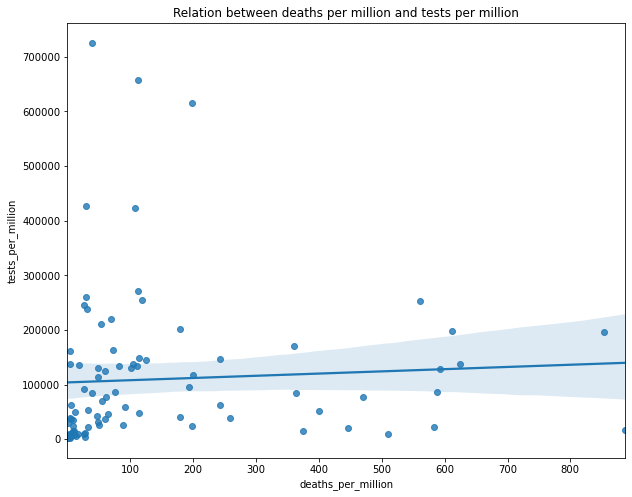

In [18]:
plt.figure(figsize= (10,8))
plt.title("Relation between deaths per million and tests per million")
sns.regplot(x=countries_covid_df.deaths_per_million , y=countries_covid_df.tests_per_million)

we can see that there is no strong relation between 

In [19]:
countries_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    210 non-null    object 
 1   continent                   210 non-null    object 
 2   population                  210 non-null    float64
 3   life_expectancy             207 non-null    float64
 4   hospital_beds_per_thousand  164 non-null    float64
 5   gdp_per_capita              183 non-null    float64
 6   total_cases                 209 non-null    float64
 7   total_deaths                209 non-null    float64
 8   total_tests                 90 non-null     float64
 9   tests_per_million           90 non-null     float64
 10  cases_per_million           209 non-null    float64
 11  deaths_per_million          209 non-null    float64
dtypes: float64(10), object(2)
memory usage: 21.3+ KB


In [20]:
countries_covid_wNan_df= countries_covid_df.dropna()

In [21]:
countries_covid_wNan_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,tests_per_million,cases_per_million,deaths_per_million
7,Argentina,South America,45195777.0,76.67,5.00,18933.907,428226.0,8971.0,1118923.0,24757.246678,9474.911782,198.491996
10,Australia,Oceania,25499881.0,83.44,3.84,44648.710,25923.0,663.0,6255797.0,245326.517406,1016.592979,26.000121
11,Austria,Europe,9006400.0,81.54,7.37,45436.686,28183.0,734.0,1210568.0,134411.973708,3129.219222,81.497602
14,Bahrain,Asia,1701583.0,77.29,2.00,43290.705,52440.0,190.0,1118837.0,657527.137965,30818.361490,111.660730
15,Bangladesh,Asia,164689383.0,72.59,0.80,3523.984,317528.0,4351.0,1514126.0,9193.828846,1928.041712,26.419432
...,...,...,...,...,...,...,...,...,...,...,...,...
198,United Kingdom,Europe,67886004.0,81.32,2.54,39753.244,338676.0,41514.0,13447568.0,198090.434075,4988.892850,611.525168
199,United States,North America,331002647.0,78.86,2.77,54225.446,6114406.0,185744.0,83898416.0,253467.507769,18472.377957,561.155633
201,Uruguay,South America,3473727.0,77.91,2.80,20551.409,1626.0,44.0,175080.0,50401.197331,468.085143,12.666511
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,1046.0,35.0,261004.0,2681.403324,10.745996,0.359570


**Relation between total number of cases in millions and total deaths in millions**

In [22]:
total_cases_per_million = countries_covid_wNan_df['cases_per_million']
total_cases_per_million

7       9474.911782
10      1016.592979
11      3129.219222
14     30818.361490
15      1928.041712
           ...     
198     4988.892850
199    18472.377957
201      468.085143
205       10.745996
209      446.614587
Name: cases_per_million, Length: 82, dtype: float64

<BarContainer object of 82 artists>

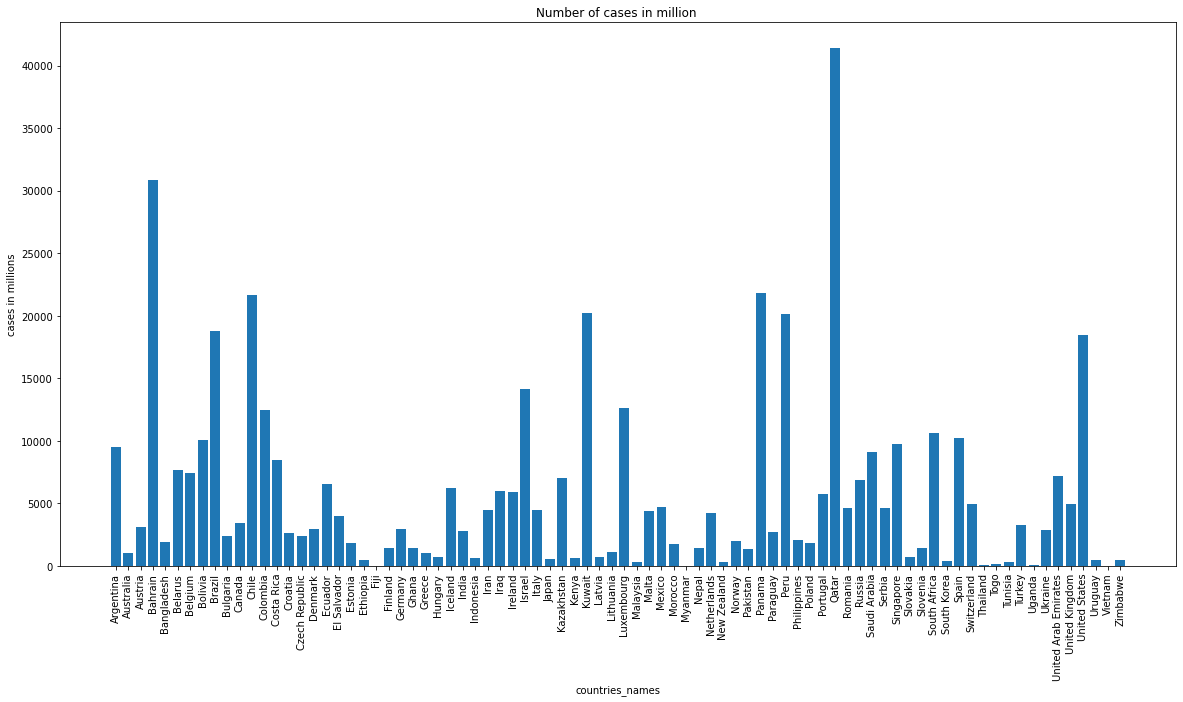

In [47]:
plt.figure(figsize = (20,10))
plt.title('Number of cases in million ')
plt.xlabel('countries_names')
plt.ylabel('cases in millions')

# plt.plot(total_cases_per_million)

plt.xticks(rotation = 90)

plt.bar(countries_covid_wNan_df.location , total_cases_per_million)


In [24]:
total_deaths_per_million = countries_covid_wNan_df['deaths_per_million']
total_deaths_per_million

7      198.491996
10      26.000121
11      81.497602
14     111.660730
15      26.419432
          ...    
198    611.525168
199    561.155633
201     12.666511
205      0.359570
209     13.859989
Name: deaths_per_million, Length: 82, dtype: float64

<BarContainer object of 82 artists>

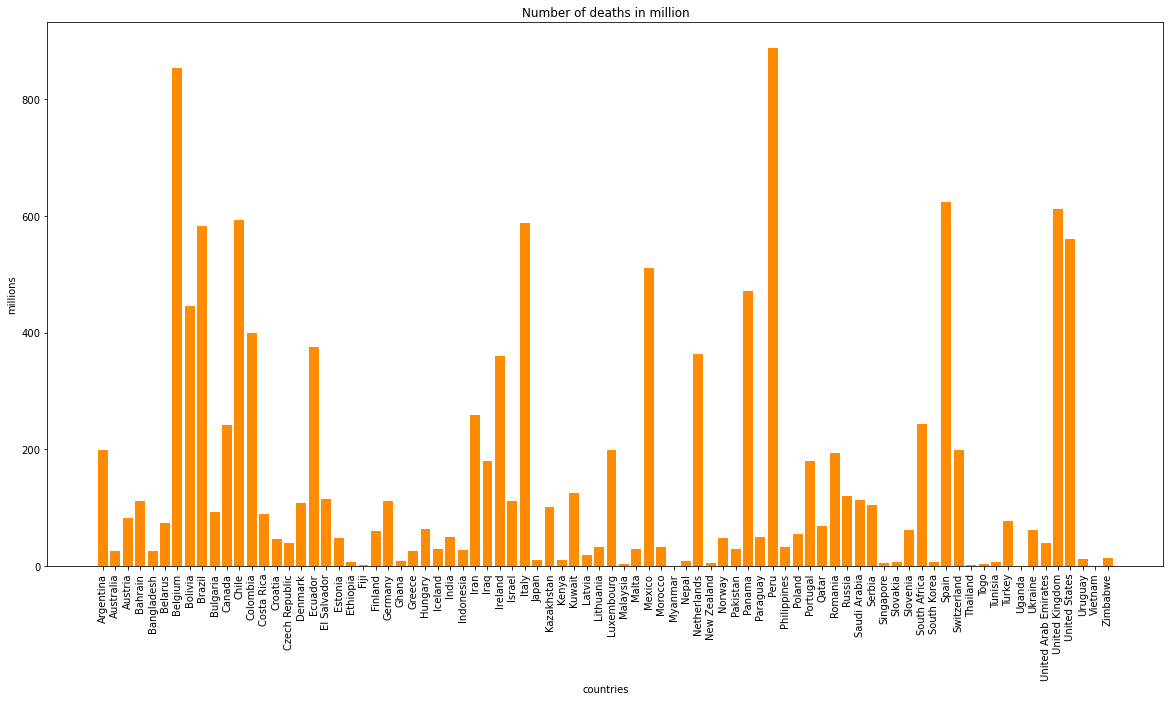

In [45]:
plt.figure(figsize = (20,10))
plt.title('Number of deaths in million')
plt.xlabel('countries')
plt.ylabel('millions')


plt.xticks(rotation = 90)

plt.bar(countries_covid_wNan_df.location,total_deaths_per_million,color = "darkorange")

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

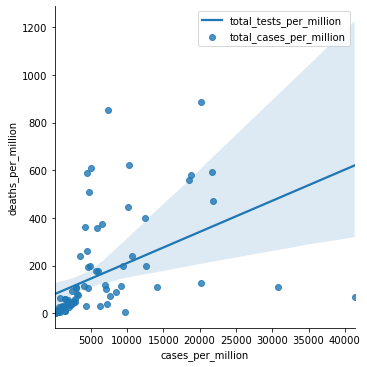

In [61]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (20,10))
sns.lmplot(data =countries_covid_wNan_df , x = 'cases_per_million',y = 'deaths_per_million')
plt.legend(['total_tests_per_million' , 'total_cases_per_million'])

*We can see that there is strong relation between cases and deaths*

**Relation between total cases in million and total tests in millions**

<BarContainer object of 82 artists>

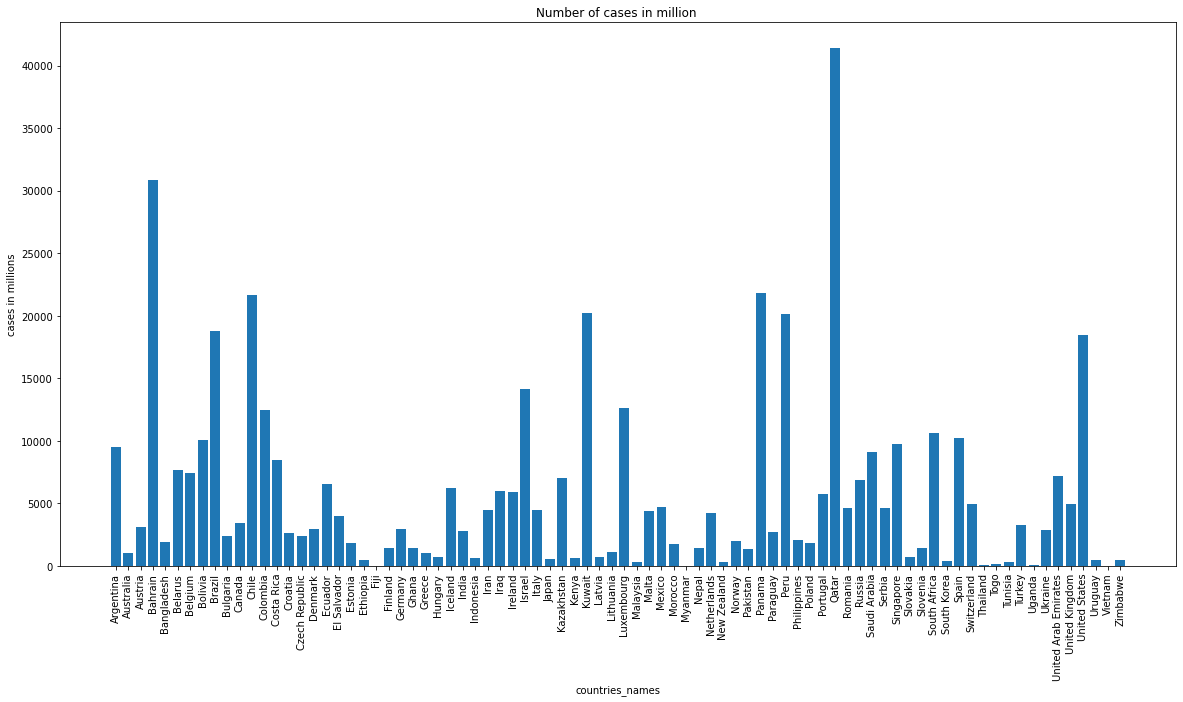

In [51]:
plt.figure(figsize = (20,10))
plt.title('Number of cases in million ')
plt.xlabel('countries_names')
plt.ylabel('cases in millions')

# sns.set(rc = {'figure.figsize':(15,8)})
# plt.xticks(rotation=90)
# sns.scatterplot(x= countries_covid_wNan_df.location, y=total_cases_per_million )
plt.xticks(rotation = 90)
plt.bar(countries_covid_wNan_df.location,total_cases_per_million)



In [28]:
total_test_per_million = countries_covid_wNan_df['tests_per_million']
total_test_per_million

7       24757.246678
10     245326.517406
11     134411.973708
14     657527.137965
15       9193.828846
           ...      
198    198090.434075
199    253467.507769
201     50401.197331
205      2681.403324
209      6544.605918
Name: tests_per_million, Length: 82, dtype: float64

<BarContainer object of 82 artists>

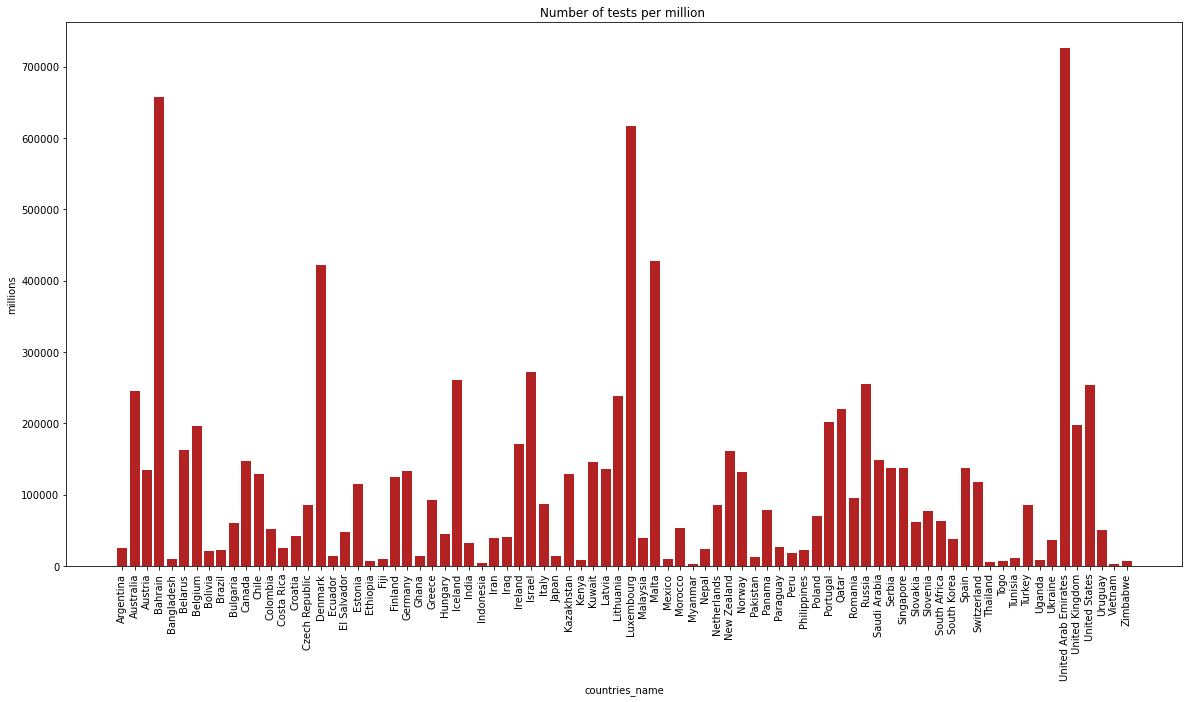

In [52]:
plt.figure(figsize = (20,10))
plt.title('Number of tests per million ')
plt.xlabel('countries_name')
plt.ylabel('millions')

plt.xticks(rotation = 90)
plt.bar(countries_covid_wNan_df.location,total_test_per_million , color = "firebrick")


<Figure size 1440x720 with 0 Axes>

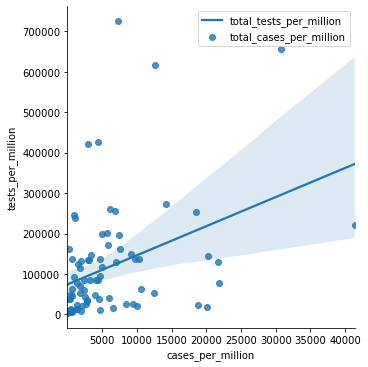

In [62]:
from matplotlib.pyplot import plot

plt.figure(figsize = (20,10))
sns.lmplot(data =countries_covid_wNan_df , x = 'cases_per_million',y = 'tests_per_million')
plt.legend(['total_tests_per_million' , 'total_cases_per_million'])

*We can see that there is string relation between tests and cases*

**Conclusion**

As we can see from above insights of our data that there was a huge loss of life , From the above data we got to know the relationships between Test and cases and deaths and cases 

we saw that there was storng relation between tests and cases and cases and deaths 